In [18]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
import os
from sklearn.datasets import clear_data_home

# Clear the previous data directory
clear_data_home(data_home=os.path.join(os.path.expanduser('~'), 'scikit_learn_data'))

# Re-fetch the dataset
dataset = fetch_california_housing(download_if_missing=True)

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
dataset.feature_names




['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
data['target'] = dataset.target

In [7]:
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
data.sample(frac=1)
train, test = train_test_split(data, test_size= 0.2)
train.shape, test.shape

((16512, 9), (4128, 9))

In [9]:
xtrain = train.Population.values.reshape(-1,1)
ytrain = train.target.values
xtest = test.Population.values.reshape(-1,1)
ytest = test.target.values

In [11]:
lr  = LinearRegression()


In [12]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [13]:
lr.coef_, lr.intercept_

(array([-2.45980654e-05]), np.float64(2.099180828626127))

In [14]:
yhat_train = lr.predict(xtrain)
yhat_test = lr.predict(xtest)

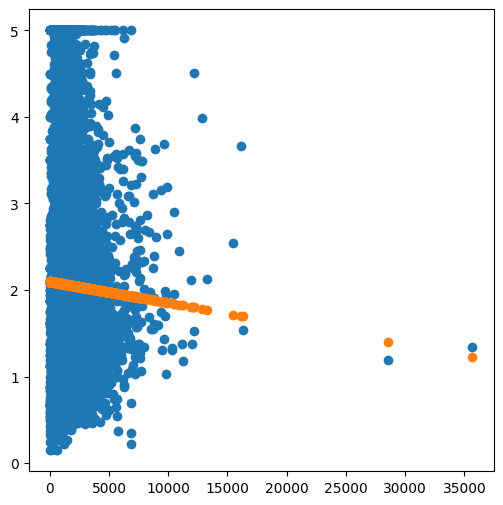

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(xtrain, ytrain)
ax.scatter(xtrain, yhat_train)

In [21]:
np.sqrt(mean_squared_error(ytrain, yhat_train))

np.float64(1.1526221702877817)

In [22]:
np.sqrt(mean_squared_error(ytest, yhat_test))

np.float64(1.1574347035019663)